importing necessary libraries

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report



linking the dataset to the code and cleaning the dataset

In [62]:
data = pd.read_csv("/content/loan_prediction (1).csv")

In [64]:
len(data)

614

In [65]:
data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [66]:
data.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [67]:
data = data.dropna()

In [68]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [69]:
data.head(5)

Loan_ID Gender Married Dependents     Education Self_Employed  \
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   
5             5417             4196.0       267.0             360.0   

   Credit_History Property_Area Loan_Status  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y  
5             1.0         Urban           Y

Uni-variate analysis

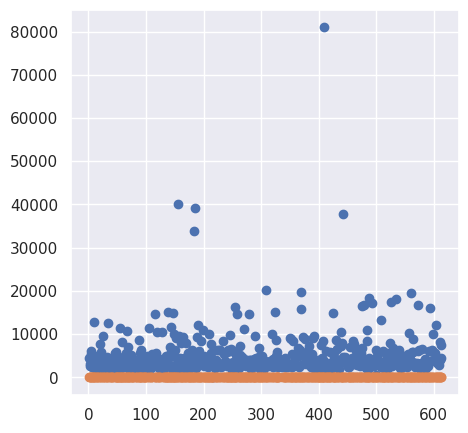

In [70]:
plt.scatter(data.index, data['ApplicantIncome'])
plt.scatter(data.index, data['Credit_History'])
plt.show()

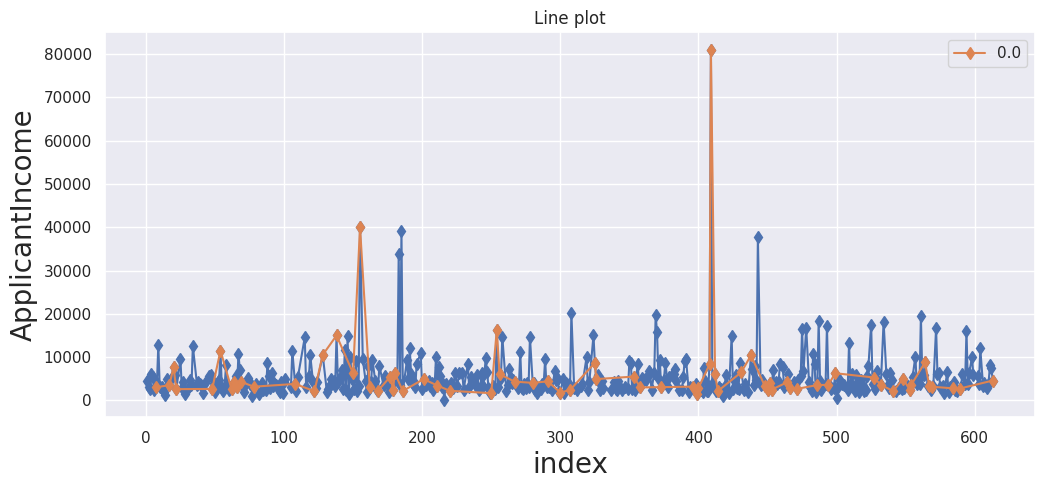

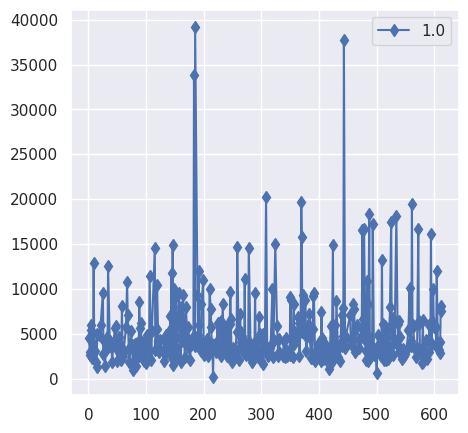

In [71]:
plt.figure(figsize=(12,5))
plt.title('Line plot')
plt.xlabel('index', fontsize=20)
plt.ylabel('ApplicantIncome', fontsize=20)
plt.plot(data.index, data['ApplicantIncome'], markevery=1, marker='d')
for name, group in data.groupby('Credit_History'):
  plt.plot (group.index, group['ApplicantIncome'], label=name, markevery=1, marker='d')
  plt.legend ()
  plt.show()

Bi-variate analysis

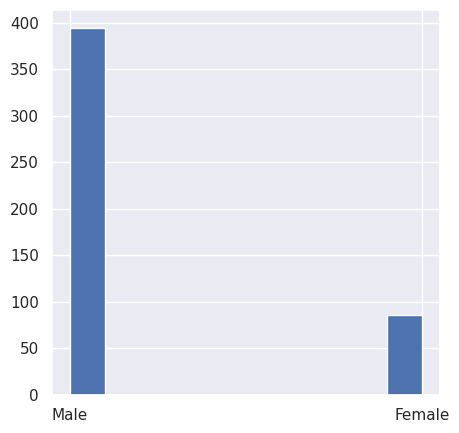

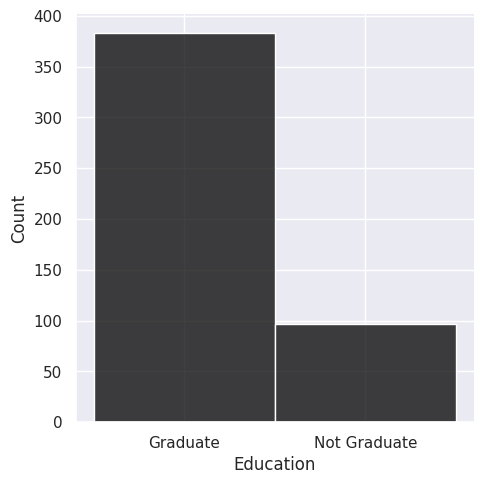

In [72]:
plt.hist(data['Gender'])
sns.displot(data['Education'], kde = False, color = 'black', bins = 10)
plt.show()

Multivariate analysis

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 77.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Credit_History', ylabel='Loan_Amount_Term'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 47.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 83.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


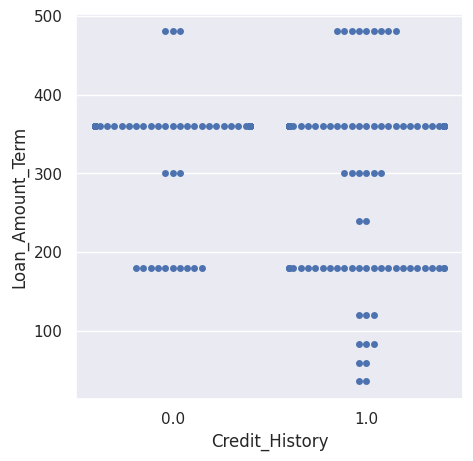

In [73]:
sns.set(rc={'figure.figsize':(5,5)})
sns.swarmplot(x = data['Credit_History'], y = data['Loan_Amount_Term'])

Data description

In [74]:
data.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       480.000000         480.000000  480.000000        480.000000   
mean       5364.231250        1581.093583  144.735417        342.050000   
std        5668.251251        2617.692267   80.508164         65.212401   
min         150.000000           0.000000    9.000000         36.000000   
25%        2898.750000           0.000000  100.000000        360.000000   
50%        3859.000000        1084.500000  128.000000        360.000000   
75%        5852.500000        2253.250000  170.000000        360.000000   
max       81000.000000       33837.000000  600.000000        480.000000   

       Credit_History  
count      480.000000  
mean         0.854167  
std          0.353307  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

handling categorical values

In [75]:
data['Gender']=data['Gender'].map({'Female':1, 'Male':0})
data['Property_Area']=data['Property_Area'].map({'Urban':2,'Semiurban':1,'Rural':0})
data['Married']=data['Married'].map({'Yes':1, 'no':0})
data['Self_Employed']=data['Self_Employed'].map({'Yes':1, 'no':0})
data['Education']=data['Education'].map({'Graduate':1, 'Not graduate':0})
data['Loan_Status']=data['Loan_Status'].map({'Y':1, 'N':0})
data['Dependents']=data['Dependents'].map({'1': 1, '0': 0, '2': 2, '3+': 3})

In [76]:
data['CoapplicantIncome']=data['CoapplicantIncome'].astype('int64')
data['Credit_History']=data['Credit_History'].astype('int64')
data['LoanAmount']=data['LoanAmount'].astype('int64')
data['Loan_Amount_Term']=data['Loan_Amount_Term'].astype('int64')


Balancing the Dataset

In [77]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import  SMOTETomek

In [78]:
smote = SMOTETomek(random_state = 1)

In [79]:
y = data['Loan_Status']
x = data.drop(columns= ['Loan_Status'],axis=1)
x = x.drop(columns= ['Loan_ID'],axis=1)

In [83]:
y = y.fillna(0)
x = x.fillna(0)

In [84]:
data['Dependents'].unique()

array([1, 0, 2, 3])

In [85]:
x_bal,y_bal= smote.fit_resample(x,y)

In [86]:
print(y.value_counts())
print(y_bal.value_counts())

1    332
0    148
Name: Loan_Status, dtype: int64
1    284
0    284
Name: Loan_Status, dtype: int64


applying standard scaler

In [89]:
sc = StandardScaler()
x_bal = sc.fit_transform(x_bal)
# x_bal = pd.DataFrame(x_bal,columns=names)

splitting the dataset

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x_bal,y_bal, test_size = 0.33, random_state = 42)

MODEL BUILDING

Decision tree

In [112]:
def DecisionTree(x_train, x_test, y_train, y_test):
  dt = DecisionTreeClassifier()
  dt.fit(x_train,y_train)
  yPred = dt.predict(x_test)
  print('Confusion matrix')
  print(confusion_matrix (y_test,yPred))
  print('Classification report')
  print(classification_report(y_test,yPred))

Random forest classifier

In [111]:
def RandomForest(x_train, x_test, y_train, y_test):
  rf = RandomForestClassifier()
  rf.fit(x_train,y_train)
  yPred = rf.predict(x_test)
  print('Confusion matrix')
  print(confusion_matrix (y_test,yPred))
  print('Classification report')
  print(classification_report(y_test,yPred))

KNN 

In [107]:
def KNN(x_train, x_test, y_train, y_test):
  knn = KNeighborsClassifier()
  knn.fit(x_train,y_train)
  yPred = knn.predict(x_test)
  print('Confusion matrix')
  print(confusion_matrix (y_test,yPred))
  print('Classification report')
  print(classification_report(y_test,yPred))

XGboost model

In [108]:
def xgboost(x_train, x_test, y_train, y_test):
  xg = GradientBoostingClassifier()
  xg.fit(x_train,y_train)
  yPred = xg.predict(x_test)
  print('Confusion matrix')
  print(confusion_matrix (y_test,yPred))
  print('Classification report')
  print(classification_report(y_test,yPred))

COMPARING THE MODELS

In [114]:
DecisionTree(x_train, x_test, y_train, y_test)

Confusion matrix
[[77 16]
 [30 65]]
Classification report
              precision    recall  f1-score   support

           0       0.72      0.83      0.77        93
           1       0.80      0.68      0.74        95

    accuracy                           0.76       188
   macro avg       0.76      0.76      0.75       188
weighted avg       0.76      0.76      0.75       188



In [113]:
RandomForest(x_train, x_test, y_train, y_test)

Confusion matrix
[[73 20]
 [13 82]]
Classification report
              precision    recall  f1-score   support

           0       0.85      0.78      0.82        93
           1       0.80      0.86      0.83        95

    accuracy                           0.82       188
   macro avg       0.83      0.82      0.82       188
weighted avg       0.83      0.82      0.82       188



In [115]:
KNN(x_train, x_test, y_train, y_test)

Confusion matrix
[[61 32]
 [18 77]]
Classification report
              precision    recall  f1-score   support

           0       0.77      0.66      0.71        93
           1       0.71      0.81      0.75        95

    accuracy                           0.73       188
   macro avg       0.74      0.73      0.73       188
weighted avg       0.74      0.73      0.73       188



In [116]:
xgboost(x_train, x_test, y_train, y_test)

Confusion matrix
[[73 20]
 [15 80]]
Classification report
              precision    recall  f1-score   support

           0       0.83      0.78      0.81        93
           1       0.80      0.84      0.82        95

    accuracy                           0.81       188
   macro avg       0.81      0.81      0.81       188
weighted avg       0.81      0.81      0.81       188



Evaluating the performance of the model and saving it 

In [117]:
from sklearn.model_selection import cross_val_score

In [119]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
ypred = rf.predict(x_test)

In [120]:
f1_score(ypred,y_test,average = 'weighted')

0.8089452980679372

In [121]:
cv = cross_val_score(rf,x,y,cv=5)

In [122]:
np.mean(cv)

0.8

In [124]:
pickle.dump(data,open('rdf.pkl','wb'))